
# How to investigate a dataset with python?

### USE CASE ::: we are going to look into a TMDB Movie dataset from Kaggle 
We’ll do some exploratory analysis to investigate the data.

### What is Exploratory Data Analysis (EDA)?
Exploratory data analysis (EDA) is a crucial component of data science which allows you to develop 
the gist of what your data look like and what kinds of questions might be answered by them.

Ultimately, EDA is important because it allows the investigator to make critical decisions 
about what is interesting to pursue and what probably isn’t worth following up on 
and thus building a hypothesis using the relationships between variables.

> "Exploratory data analysis can never be the whole story, 
> but nothing else can serve as the foundation stone. — John Tukey"


### PYTHON WAY
The first step is to create a virtual environment in which you will install all your packages.

> **pip install numpy pandas seaborn matplotlib**

In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from datetime import datetime
%matplotlib inline

# Load movies dataset from CSV file into dataframe
movies_df = pd.read_csv("D:\\Personal\\LEARNING\\DATA SCIENCE\\Datasets\\tmdb_5000_movies.csv")
movies_df.head()

# Load credits dataset from CSV file into dataframe
credits_df = pd.read_csv("D:/Personal/LEARNING/DATA SCIENCE/Datasets/tmdb_5000_credits.csv")
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."



Before we start looking for the hidden answers in this data, 
we’ll have to clean the data to prepare it for analysis.

## (1) Data Cleansing Process
Data cleansing is the first and a very crucial step in the overall data preparation process 
and is the process of analysing, identifying and correcting messy, raw data. 
When analysing organisational data to make strategic decisions 
you must start with a thorough data cleansing process.


### 1) First step is to clean the data and see which are the unnecessary or redundant cols


In [ ]:
del_col_list = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 
                'overview', 'production_companies', 'original_title']
movies_df = movies_df.drop(del_col_list, axis=1)
movies_df.head()

### 2) Dropping the duplicates(rows/behavior) from dataset.

In [2]:
print(movies_df.shape)
movies_df = movies_df.drop_duplicates(keep='first')
print(movies_df.shape)

(4803, 12)
(4803, 12)


### FINDING MISSING VALUES

Data in real world are rarely clean and homogeneous. 
Data can either be missing during data extraction or collection. 
Missing values need to be handled because they reduce the quality for any of our performance metric. 
It can also lead to wrong prediction or classification and can also cause a high bias 
for any given model being used.

Pandas always identify missing values as NaN. 
However, unless the data has been pre-processed to a degree that an analyst will encounter missing values as NaN. 
Missing values can appear as a question mark (?) or a zero (0) or minus one (-1) or a blank.

> Find the standard missing values that pandas can detect

The total number of non null observations present including the total number of entries. 
Once number of entries isn’t equal to number of non null observations, we can begin to suspect missing values.

> **movies_df.info()**

> Find the continuous data is having any 0's, -1's using min

This will display a summary statistics of all observed features and labels. 
The most important to note here is the min value. 
Once we see -1/0 in an observation like age/height/weight, then we have been able to detect missing value.

> **movies_df.describe()**

This will output the first x rows of our data. 
Viewing this will give one a quick view on the presence of NaN/-1/0/blank/? among others.

> **movies_df.head(20)**

This will tell us the total number of NaN in or data.

> **movies_df.isnull().sum()**

If the missing value isn’t identified as NaN , 
then we have to first convert or replace such non NaN entry with a NaN.


### 3) Replace or convert 0's with NaN

In [3]:
# Replacing all the zeros from revenue and budget cols.
cols = ['budget','revenue']
movies_df[cols].replace(0,np.nan, inplace=True)
movies_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 12 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
popularity              4803 non-null float64
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 487.8+ KB


C:\Users\pumaturi\Anaconda3\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64

### MISSING VALUE TREATMENT

> **1) Dropping null or missing values**

This method reduces the quality of our model as it reduces sample size 
because it works by deleting all other observations where any of the variable is missing. 

In [ ]:
movies_df.dropna()

> **2) Filling Missing values**

This is a process whereby missing values are replaced with a test statistic like mean, median or mode 
of the particular feature the missing value belongs to. 
One can also specify a forward-fill or back-fill to propagate the next values backward or previous value forward.

> **Filling missing values with a test statistic:**


In [ ]:
# Budget and Revenue are column names for our train data
mean_value = movies_df['budget'].mean()
movies_df['budget'] = movies_df['budget'].fillna( mean_value )
#this will replace all NaN values with the mean of the non null values

# For median
median_value = movies_df['revenue'].median()
movies_df['revenue'] = movies_df['revenue'].fillna( median_value )
print(movies_df.info())
print(movies_df.describe())


The disadvantage of using mean is that the mean is greatly affected by outliers in our data. 
As a result, if outliers are present in our data, then median will be the best out of the box tool to use.

Alternative way of filling missing value with test statistic is by using our Imputer method found 
in sklearn.preprocessing.


*print(movies_df[['budget','revenue']].values)*

*df_cols_matrix = movies_df[['budget','revenue'].values*

*from sklearn.impute import SimpleImputer*
                             
*imp = SimpleImputer(missing_values=np.nan, strategy='median')*
                            
*imp.fit(df_cols_matrix)*
                            
*movies_df = imp.transform(df_cols_matrix)*

This will look for all columns where we have **NaN** value and replace the NaN value 
with specified test statistic.
                             
For mode we specify strategy='most_frequent'

> For Back-fill or forward-fill to propagate next or previous values respectively:

for back fill
                            
*movies_df.fillna(method='bfill')*

for forward fill
                            
*movies_df.fillna(method='ffill')*

One can also specify an axis to propagate (1 is for rows and 0 is for columns)
                             
*movies_df.fillna(method='bfill', axis=1)*

If a previous or next value isn’t available or rather if it is also a NaN value, 
then, the NaN remains even after back-filling or forward-filling.


> **3) Predictive model for handling missing values**

This is by far one of the best and most efficient method for handling missing data. 
Depending on the class of data that is missing, one can either use a regression model or classification 
to predict missing data. This works by turning missing features to labels themselves 
and now using columns without missing values to predict columns with missing values.

The process goes thus:

> Call the variable where you have missing values as y.

> Split data into sets with missing values and without missing values, name the missing set X_text
> and the one without missing values X_train 
> and take y (variable or feature where there is missing values) off the second set, naming it y_train.

> Use one of classification methods to predict y_pred.

> Add it to X_test as your y_test column. Then combine sets together.

For a beginner or newbie in machine learning, this approach might seem more difficult. 
The only drawback to this approach is that if there is no correlation between attributes with missing data
and other attributes in the data set, then the model will be bias for predicting missing values.


### 4) To manipulate the columns easily, it is important that we make use of the python objects.

In [5]:
#  Changing release date column into Date format and extracting the year from the date
#  which will help us in analysing yearly data.
movies_df.release_date = pd.to_datetime(movies_df['release_date'])

# Extract the releae year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df.head()


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012.0


### 5) Similarly, changing budget and revenue columns format to integer 

In [6]:
#  using numpy’s int64 method.
change_cols = ['budget','revenue']
# changing data type
movies_df[change_cols] = movies_df[change_cols].applymap(np.int64)
#change_columns = ['Action','Adventure','Fantasy', 'Science Fiction']
# changing data type
#movies_df[change_columns] = movies_df[change_columns].applymap(np.int64)
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
release_year                   float64
dtype: object

### 6) On checking the dataset, 
  we see that genres, keywords, production_companies, production_countries, spoken_languages
  are in the JSON format which will make it while manipulating the dataframe. 
### Now let’s flatten these columns into a format 
  that can be easily interpreted.

In [7]:
#We will convert them into strings and later convert them into lists. 
#Writing a generic function to parse JSON columns.
import json

def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
#parse_col_json('genres', "name")
#parse_col_json('spoken_languages', 'name')
#parse_col_json('cast', 'name')
#parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012.0


## (2) Identifying relationships between variables / features

The main goal here is to identify and create relationships which can help you 
to build a hypothesis. We’ll have to define questions which can help us 
build some relationships to look at.

At this point, I came up with the following questions when I studied this dataset. 
You may come up with a different set of questions which are not listed below:

1. Which are the 5 most expensive movies? 
2. Comparison between the extremes? 
Exploring the most expensive movies, it can tell you if they were even worth 
the money spent on them based on their performance and revenue generated.


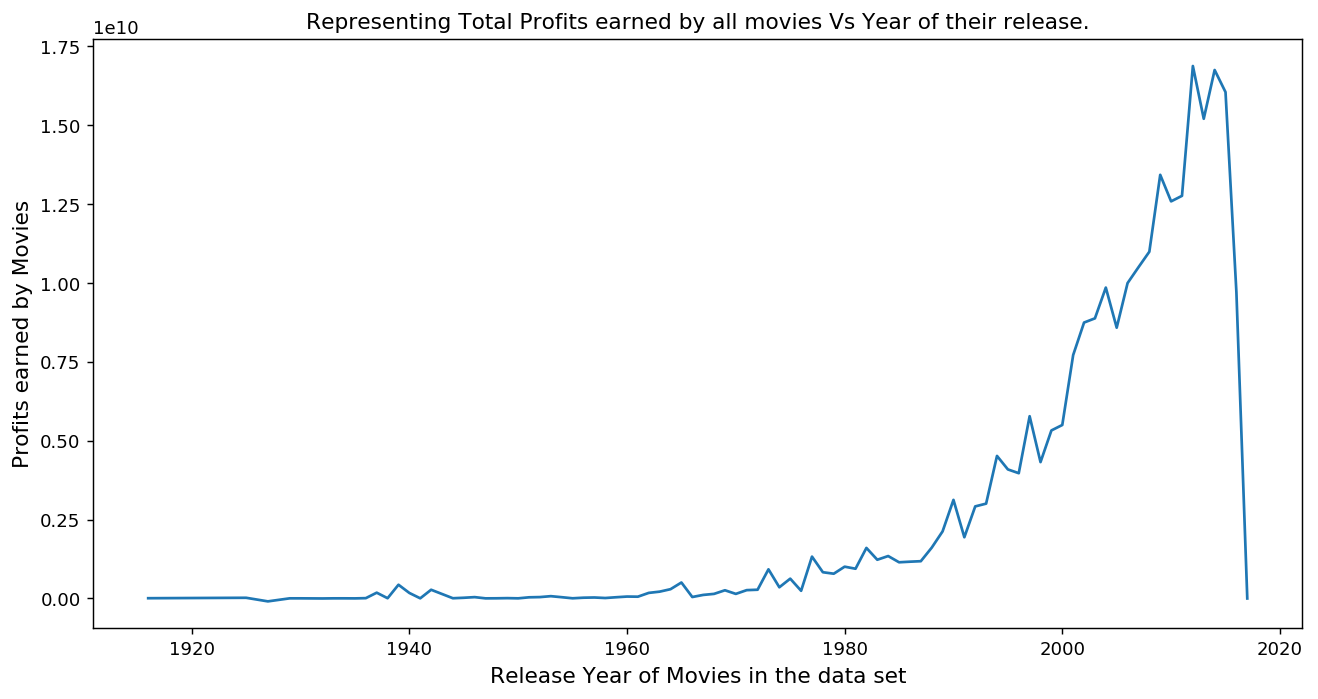

In [8]:
# Answer to question #1.
# To find out the most expensive movies, we need to look at the budget set for them which is an indicator of expense.

expensive_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
expensive_movies_df

'''
2. Since we need to compare the minimums and maximums in 3 questions, 
we can write a generic function to do that for us and reuse that.
'''
def find_min_max_in(col):
    """
    The function takes in a column and returns the top 5
    and bottom 5 movies dataframe in that column.
    
    args:
        col: string - column name
    return:
        info_df: dataframe - final 5 movies dataframe
    """
    
    top = movies_df[col].idxmax()
    top_df = pd.DataFrame(movies_df.loc[top])
    
    bottom = movies_df[col].idxmin()
    bottom_df = pd.DataFrame(movies_df.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('budget')

'''
3. Top 5 most profitable movies? Comparison between the min and max profits. 
The comparison helps us in identifying the different approaches which failed and succeeded. If I subtract the budget from the revenue generated, it will give me the profit earned.
'''
# to find the most profitable movies, we need to find who made the most 
# amount after deducting the budget from the revenue generated.

movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
cols = ['budget',
         'profit',
         'revenue',
         'genres',
         'id',
         'popularity',
         'production_countries',
        'release_date',
        'release_year',
         'runtime',
         'spoken_languages',
         'title',
        #'cast',
         'vote_average',
         'vote_count']
movies_df = movies_df[cols]
movies_df.sort_values(by = ['budget'], ascending=False).head()

'''
4. Most talked about Movies.
'''
# to find the most talked about movies, we can sort the dataframe on the popularity column
popular_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
popular_movies_df.head()

'''
5. Average runtime of movies? Comparison between the extremes.
'''
# in terms of runtime
# Average runtime of movies
movies_df['runtime'].mean()
# comparison
find_min_max_in('runtime')

'''
6. Movies which are rated above 7
'''
movies_df[movies_df['vote_average'] >= 7.0]

'''
7. Which year did we have the most profitable movies?
This will help you raise some deeper questions about the years when movies didn’t do well
or when they did. These are preliminary questions which give rise to questions 
providing deeper insights.
'''
profits_year = movies_df.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()


In [9]:
'''
To find the year in which we had the most number of profitable movies, 
we used idxmax method :
'''
# Most profitable year from the given dataset.
profits_year.idxmax()

2012.0

Now that we’ve analysed at what this dataset contains, it’s time that we try 
to build a story which can predict the success rate of a movie 
based on the features / variables chosen. Hence, we need to determine 
the factors which make a movie profitable.

Following is the list of questions which can lead us in the desired direction:-

Most successful genres — bar plot explaining the frequency of movies in each genre.
Frequent Cast in movies — plot showing the spectrum of movies for each actor.
Average budget of the profitable movies — what is the average budget allocated
Average duration of the most profitable movies.
Language of the most profitable movies.
Answers to all the questions above would help us build our hypothesis which is 
“What is the recipe to make a blockbuster, profitable movie?”


**References:**
> https://towardsdatascience.com/hitchhikers-guide-to-exploratory-data-analysis-6e8d896d3f7e
    
> https://towardsdatascience.com/the-tale-of-missing-values-in-python-c96beb0e8a9d


### Feature Selection and Dimensionality Reduction

Often, feature selection and dimensionality reduction are grouped together. While both methods are used 
for reducing the number of features in a dataset, there is an important difference.

Feature selection is simply selecting and excluding given features without changing them.
Dimensionality reduction transforms features into a lower dimension.

In [11]:
'''
Baseline Model
We’ll use logistic regression as our baseline model. 
We first split into test and train sets and scale the data:
'''
from sklearn.preprocessing import StandardScaler

# prepare for modeling
X_train_df = movies_df.drop(['id', 'revenue'], axis=1)
y_train = movies_df['revenue']

# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)

lr = LogisticRegression(solver='liblinear')
lr_scores = cross_val_score(lr,
                            X_train,
                            y_train,
                            cv=5,
                            scoring='roc_auc')

print('LR Scores: ', lr_scores)


#Remove highly correlated features
corr_matrix = movies_df.corr().abs()
print(corr_matrix['budget'].sort_values(ascending=False).head(10))

# Find index of feature columns with high correlation
to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.50)]
print('Columns to drop: ' , (len(to_drop)))

ValueError: could not convert string to float: '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'